In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Attention, Input, LSTM, Dense

In [2]:
df1=pd.read_excel(r'C:\Users\z041711\Downloads\nasadatset1.xlsx',sheet_name='B0001')
df2=pd.read_excel(r'C:\Users\z041711\Downloads\nasadatset1.xlsx',sheet_name='B0002')
df3=pd.read_excel(r'C:\Users\z041711\Downloads\nasadatset1.xlsx',sheet_name='B0003')
df4=pd.read_excel(r'C:\Users\z041711\Downloads\nasadatset1.xlsx',sheet_name='B0004')

In [3]:
df1

,Discharge Cycles,Capacity,Unnamed: 2,Next_Capacity,Unnamed: 4,Unnamed: 5,Unnamed: 6,B0005
0,1,1.856487,0.010160,1.846327,NaN,NaN,NaN,NaN
1,2,1.846327,0.010978,1.835349,NaN,NaN,NaN,NaN
2,3,1.835349,0.000087,1.835263,NaN,NaN,NaN,NaN
3,4,1.835263,0.000617,1.834646,NaN,NaN,NaN,NaN
4,5,1.834646,-0.001016,1.835662,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
163,164,1.293464,0.005460,1.288003,NaN,NaN,NaN,NaN
164,165,1.288003,0.000551,1.287453,NaN,NaN,NaN,NaN
165,166,1.287453,-0.021563,1.309015,NaN,NaN,NaN,NaN
166,167,1.309015,-0.016064,1.325079,NaN,NaN,NaN,NaN


In [4]:
df2

,Discharge Cycles,Capacity,Unnamed: 2,Next_Capacity,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1,2.035338,0.010197,2.025140,NaN,NaN,NaN,NaN,B0006
1,2,2.025140,0.011814,2.013326,NaN,NaN,NaN,NaN,NaN
2,3,2.013326,0.000042,2.013285,NaN,NaN,NaN,NaN,NaN
3,4,2.013285,0.012756,2.000528,NaN,NaN,NaN,NaN,NaN
4,5,2.000528,-0.013371,2.013899,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
163,164,1.153818,-0.010583,1.164401,NaN,NaN,NaN,NaN,NaN
164,165,1.164401,0.005603,1.158797,NaN,NaN,NaN,NaN,NaN
165,166,1.158797,-0.016177,1.174975,NaN,NaN,NaN,NaN,NaN
166,167,1.174975,-0.010700,1.185675,NaN,NaN,NaN,NaN,NaN


In [5]:
df3

,Discharge Cycles,Capacity,Unnamed: 2,Next_Capacity,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,B0007
0,1,1.891052,0.010415,1.880637,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.880637,-0.000026,1.880663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.880663,-0.000108,1.880771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.880771,0.001320,1.879451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1.879451,-0.001249,1.880700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,164,1.406171,-0.000164,1.406336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,165,1.406336,0.005881,1.400455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,166,1.400455,-0.021331,1.421787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,167,1.421787,-0.010669,1.432455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df4

,Discharge Cycles,Capacity,Delta,Next_Capacity,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,B0018
0,1,1.855005,0.011809,1.843196,NaN,NaN,NaN,NaN,NaN
1,2,1.843196,0.003594,1.839602,NaN,NaN,NaN,NaN,NaN
2,3,1.839602,0.008928,1.830674,NaN,NaN,NaN,NaN,NaN
3,4,1.830674,-0.002027,1.832700,NaN,NaN,NaN,NaN,NaN
4,5,1.832700,0.004171,1.828529,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
127,128,1.362737,-0.000668,1.363405,NaN,NaN,NaN,NaN,NaN
128,129,1.363405,0.011541,1.351865,NaN,NaN,NaN,NaN,NaN
129,130,1.351865,-0.002932,1.354797,NaN,NaN,NaN,NaN,NaN
130,131,1.354797,0.013746,1.341051,NaN,NaN,NaN,NaN,NaN


In [7]:
selected_columns = ['Discharge Cycles', 'Capacity']
df_selected_1 = df1[selected_columns]
df_selected_2 = df2[selected_columns]
df_selected_3 = df3[selected_columns]
df_selected_4 = df4[selected_columns]

In [8]:
df_selected_1

,Discharge Cycles,Capacity
0,1,1.856487
1,2,1.846327
2,3,1.835349
3,4,1.835263
4,5,1.834646
...,...,...
163,164,1.293464
164,165,1.288003
165,166,1.287453
166,167,1.309015


In [9]:
df_selected_2

,Discharge Cycles,Capacity
0,1,2.035338
1,2,2.025140
2,3,2.013326
3,4,2.013285
4,5,2.000528
...,...,...
163,164,1.153818
164,165,1.164401
165,166,1.158797
166,167,1.174975


In [10]:
df_selected_3

,Discharge Cycles,Capacity
0,1,1.891052
1,2,1.880637
2,3,1.880663
3,4,1.880771
4,5,1.879451
...,...,...
163,164,1.406171
164,165,1.406336
165,166,1.400455
166,167,1.421787


In [11]:
df_selected_4

,Discharge Cycles,Capacity
0,1,1.855005
1,2,1.843196
2,3,1.839602
3,4,1.830674
4,5,1.832700
...,...,...
127,128,1.362737
128,129,1.363405
129,130,1.351865
130,131,1.354797


In [12]:
df_selected_1_1=df_selected_1.to_numpy().reshape(168, 2)

In [13]:
df_selected_2_2=df_selected_2.to_numpy().reshape(168, 2)

In [14]:
df_selected_3_3=df_selected_3.to_numpy().reshape(168, 2)

In [15]:
df_selected_4_4=df_selected_4.to_numpy().reshape(132, 2)

In [16]:
df_selected_1_1


array([[  1.        ,   1.85648742],
       [  2.        ,   1.84632725],
       [  3.        ,   1.83534919],
       [  4.        ,   1.83526253],
       [  5.        ,   1.83464551],
       [  6.        ,   1.83566166],
       [  7.        ,   1.83514614],
       [  8.        ,   1.82575679],
       [  9.        ,   1.82477385],
       [ 10.        ,   1.82461327],
       [ 11.        ,   1.82461955],
       [ 12.        ,   1.81420194],
       [ 13.        ,   1.81375216],
       [ 14.        ,   1.81344049],
       [ 15.        ,   1.802598  ],
       [ 16.        ,   1.8021069 ],
       [ 17.        ,   1.8025795 ],
       [ 18.        ,   1.80306831],
       [ 19.        ,   1.80277762],
       [ 20.        ,   1.84702599],
       [ 21.        ,   1.84741731],
       [ 22.        ,   1.83617742],
       [ 23.        ,   1.82578075],
       [ 24.        ,   1.82511364],
       [ 25.        ,   1.8255815 ],
       [ 26.        ,   1.81403113],
       [ 27.        ,   1.81476919],
 

In [17]:
df_selected_1_1.shape


(168, 2)

In [18]:
sequence_length = 10

In [19]:
X_train_1 = []
for i in range(len(df_selected_1_1) - sequence_length):
    X_train_1.append(df_selected_1_1[i:i+sequence_length])
    # y_train.append(df_selected_train[i+sequence_length+1][1])
X_train_1 = np.array(X_train_1)
#y_train = np.array(y_train)
print(X_train_1)

[[[  1.           1.85648742]
  [  2.           1.84632725]
  [  3.           1.83534919]
  ...
  [  8.           1.82575679]
  [  9.           1.82477385]
  [ 10.           1.82461327]]

 [[  2.           1.84632725]
  [  3.           1.83534919]
  [  4.           1.83526253]
  ...
  [  9.           1.82477385]
  [ 10.           1.82461327]
  [ 11.           1.82461955]]

 [[  3.           1.83534919]
  [  4.           1.83526253]
  [  5.           1.83464551]
  ...
  [ 10.           1.82461327]
  [ 11.           1.82461955]
  [ 12.           1.81420194]]

 ...

 [[156.           1.31347513]
  [157.           1.31320206]
  [158.           1.30779599]
  ...
  [163.           1.29807351]
  [164.           1.29346361]
  [165.           1.28800339]]

 [[157.           1.31320206]
  [158.           1.30779599]
  [159.           1.30303292]
  ...
  [164.           1.29346361]
  [165.           1.28800339]
  [166.           1.28745252]]

 [[158.           1.30779599]
  [159.           1.3030

In [20]:
X_train_2 = []
for i in range(len(df_selected_2_2) - sequence_length):
    X_train_2.append(df_selected_2_2[i:i+sequence_length])
    # y_train.append(df_selected_train[i+sequence_length+1][1])
X_train_2 = np.array(X_train_2)
#y_train = np.array(y_train)
print(X_train_2)

[[[  1.           2.03533759]
  [  2.           2.02514025]
  [  3.           2.01332637]
  ...
  [  8.           1.96878983]
  [  9.           1.96816618]
  [ 10.           1.95723079]]

 [[  2.           2.02514025]
  [  3.           2.01332637]
  [  4.           2.01328467]
  ...
  [  9.           1.96816618]
  [ 10.           1.95723079]
  [ 11.           1.94559915]]

 [[  3.           2.01332637]
  [  4.           2.01328467]
  [  5.           2.00052834]
  ...
  [ 10.           1.95723079]
  [ 11.           1.94559915]
  [ 12.           1.9347505 ]]

 ...

 [[156.           1.22173976]
  [157.           1.21110268]
  [158.           1.20561598]
  ...
  [163.           1.17459528]
  [164.           1.15381833]
  [165.           1.16440096]]

 [[157.           1.21110268]
  [158.           1.20561598]
  [159.           1.20089363]
  ...
  [164.           1.15381833]
  [165.           1.16440096]
  [166.           1.15879749]]

 [[158.           1.20561598]
  [159.           1.2008

In [21]:
X_train_3 = []
for i in range(len(df_selected_3_3) - sequence_length):
    X_train_3.append(df_selected_3_3[i:i+sequence_length])
    # y_train.append(df_selected_train[i+sequence_length+1][1])
X_train_3 = np.array(X_train_3)
#y_train = np.array(y_train)
print(X_train_3)

[[[  1.           1.8910523 ]
  [  2.           1.88063703]
  [  3.           1.88066267]
  ...
  [  8.           1.88150881]
  [  9.           1.86969079]
  [ 10.           1.87005238]]

 [[  2.           1.88063703]
  [  3.           1.88066267]
  [  4.           1.8807709 ]
  ...
  [  9.           1.86969079]
  [ 10.           1.87005238]
  [ 11.           1.87004424]]

 [[  3.           1.88066267]
  [  4.           1.8807709 ]
  [  5.           1.87945087]
  ...
  [ 10.           1.87005238]
  [ 11.           1.87004424]
  [ 12.           1.8596519 ]]

 ...

 [[156.           1.43180842]
  [157.           1.42625626]
  [158.           1.42608775]
  ...
  [163.           1.41099496]
  [164.           1.40617143]
  [165.           1.40633585]]

 [[157.           1.42625626]
  [158.           1.42608775]
  [159.           1.42126335]
  ...
  [164.           1.40617143]
  [165.           1.40633585]
  [166.           1.40045524]]

 [[158.           1.42608775]
  [159.           1.4212

In [22]:
X_train_4 = []
for i in range(len(df_selected_4_4) - sequence_length):
    X_train_4.append(df_selected_4_4[i:i+sequence_length])
    # y_train.append(df_selected_train[i+sequence_length+1][1])
X_train_4 = np.array(X_train_4)
#y_train = np.array(y_train)
print(X_train_4)

[[[  1.           1.85500452]
  [  2.           1.84319553]
  [  3.           1.83960184]
  ...
  [  8.           1.81517001]
  [  9.           1.80429805]
  [ 10.           1.82310023]]

 [[  2.           1.84319553]
  [  3.           1.83960184]
  [  4.           1.8306736 ]
  ...
  [  9.           1.80429805]
  [ 10.           1.82310023]
  [ 11.           1.81212535]]

 [[  3.           1.83960184]
  [  4.           1.8306736 ]
  [  5.           1.83270021]
  ...
  [ 10.           1.82310023]
  [ 11.           1.81212535]
  [ 12.           1.80469164]]

 ...

 [[120.           1.34623088]
  [121.           1.42684278]
  [122.           1.40644815]
  ...
  [127.           1.36865863]
  [128.           1.36273718]
  [129.           1.36340511]]

 [[121.           1.42684278]
  [122.           1.40644815]
  [123.           1.39349075]
  ...
  [128.           1.36273718]
  [129.           1.36340511]
  [130.           1.3518646 ]]

 [[122.           1.40644815]
  [123.           1.3934

In [23]:
y_train_1=df_selected_1['Capacity'].values 
y_train_1

array([1.85648742, 1.84632725, 1.83534919, 1.83526253, 1.83464551,
       1.83566166, 1.83514614, 1.82575679, 1.82477385, 1.82461327,
       1.82461955, 1.81420194, 1.81375216, 1.81344049, 1.802598  ,
       1.8021069 , 1.8025795 , 1.80306831, 1.80277762, 1.84702599,
       1.84741731, 1.83617742, 1.82578075, 1.82511364, 1.8255815 ,
       1.81403113, 1.81476919, 1.81396939, 1.80276567, 1.80407704,
       1.85180255, 1.83070385, 1.81990411, 1.80930796, 1.8046099 ,
       1.79937707, 1.78844323, 1.78292305, 1.77303372, 1.77303776,
       1.76787211, 1.76231507, 1.76761729, 1.76266836, 1.75173049,
       1.7418496 , 1.73609135, 1.79362401, 1.78318902, 1.76736421,
       1.75701779, 1.74687062, 1.74171725, 1.73642251, 1.72632172,
       1.71580654, 1.71053335, 1.7060145 , 1.70031103, 1.69457986,
       1.68490291, 1.67447416, 1.67456925, 1.66371638, 1.65901387,
       1.65385406, 1.64265378, 1.63785784, 1.63273504, 1.62775289,
       1.62212549, 1.61132566, 1.60656314, 1.60151422, 1.59036

In [24]:
y_train_2=df_selected_2['Capacity'].values 
y_train_2

array([2.03533759, 2.02514025, 2.01332637, 2.01328467, 2.00052834,
       2.01389908, 2.01310111, 1.96878983, 1.96816618, 1.95723079,
       1.94559915, 1.9347505 , 1.92327995, 1.91188993, 1.90106671,
       1.88919899, 1.87827837, 1.86756972, 1.86758926, 1.97962655,
       1.95754991, 1.94581502, 1.92424611, 1.94598113, 1.90140793,
       1.87867421, 1.86830613, 1.85602441, 1.8451998 , 1.85722889,
       1.92477609, 1.88223175, 1.85527669, 1.83925089, 1.81853961,
       1.81347701, 1.79710185, 1.78100463, 1.77101304, 1.76047124,
       1.75029138, 1.7394925 , 1.75467666, 1.76593909, 1.73378874,
       1.71332591, 1.70240778, 1.82371946, 1.80812841, 1.77576109,
       1.74474098, 1.72920703, 1.70810866, 1.69759542, 1.68206345,
       1.67147683, 1.66075914, 1.65112102, 1.64013493, 1.62919994,
       1.60884963, 1.60352449, 1.59897121, 1.58762731, 1.58297197,
       1.56713764, 1.56134461, 1.55117119, 1.54067416, 1.52531387,
       1.53015703, 1.52465668, 1.5145493 , 1.5093915 , 1.50399

In [25]:
y_train_3=df_selected_3['Capacity'].values 
y_train_3

array([1.8910523 , 1.88063703, 1.88066267, 1.8807709 , 1.87945087,
       1.88070035, 1.87993525, 1.88150881, 1.86969079, 1.87005238,
       1.87004424, 1.8596519 , 1.85907466, 1.85900846, 1.85936226,
       1.85873555, 1.84781729, 1.84852529, 1.84837895, 1.88078054,
       1.88147216, 1.88109543, 1.87100896, 1.87019952, 1.87067154,
       1.85961246, 1.86003391, 1.85916531, 1.84813982, 1.8492017 ,
       1.88346774, 1.86282111, 1.85208504, 1.84695046, 1.83682843,
       1.83716196, 1.83167226, 1.8211471 , 1.81650609, 1.81138156,
       1.81160563, 1.8060549 , 1.81320418, 1.80626419, 1.79583102,
       1.78588526, 1.78032686, 1.81507569, 1.81570252, 1.80024322,
       1.79044762, 1.78034303, 1.77532877, 1.77026297, 1.76008106,
       1.74964759, 1.74965008, 1.74502874, 1.73964575, 1.72856423,
       1.72390032, 1.71397888, 1.7139702 , 1.70365212, 1.70401375,
       1.69357162, 1.68765774, 1.68307444, 1.67792701, 1.67320603,
       1.66743672, 1.66226626, 1.65742431, 1.65253868, 1.64721

In [26]:
y_train_4=df_selected_4['Capacity'].values 
y_train_4

array([1.85500452, 1.84319553, 1.83960184, 1.8306736 , 1.83270021,
       1.82852888, 1.82120119, 1.81517001, 1.80429805, 1.82310023,
       1.81212535, 1.80469164, 1.79084435, 1.78347072, 1.78093861,
       1.77120904, 1.7686304 , 1.75363048, 1.74621974, 1.73766473,
       1.73151667, 1.70859499, 1.71146996, 1.70750214, 1.74923821,
       1.73276971, 1.72223133, 1.7118463 , 1.69926784, 1.69403664,
       1.68190271, 1.67697706, 1.66552293, 1.65719246, 1.64822416,
       1.63877015, 1.62764869, 1.6221537 , 1.61400665, 1.67605162,
       1.64930064, 1.63238299, 1.61641597, 1.61090284, 1.59546387,
       1.72670744, 1.71656739, 1.69582356, 1.67777832, 1.66065869,
       1.66641093, 1.64683362, 1.62576399, 1.61215774, 1.60573668,
       1.67364531, 1.64043486, 1.61326533, 1.59209643, 1.58660118,
       1.58007665, 1.5641733 , 1.55561827, 1.54020453, 1.5321613 ,
       1.53162324, 1.5222596 , 1.50652671, 1.50142196, 1.49635341,
       1.5334262 , 1.52384527, 1.5011921 , 1.49241767, 1.48332

In [27]:
y_train_1_1=y_train_1[10:]
y_train_1_1

array([1.82461955, 1.81420194, 1.81375216, 1.81344049, 1.802598  ,
       1.8021069 , 1.8025795 , 1.80306831, 1.80277762, 1.84702599,
       1.84741731, 1.83617742, 1.82578075, 1.82511364, 1.8255815 ,
       1.81403113, 1.81476919, 1.81396939, 1.80276567, 1.80407704,
       1.85180255, 1.83070385, 1.81990411, 1.80930796, 1.8046099 ,
       1.79937707, 1.78844323, 1.78292305, 1.77303372, 1.77303776,
       1.76787211, 1.76231507, 1.76761729, 1.76266836, 1.75173049,
       1.7418496 , 1.73609135, 1.79362401, 1.78318902, 1.76736421,
       1.75701779, 1.74687062, 1.74171725, 1.73642251, 1.72632172,
       1.71580654, 1.71053335, 1.7060145 , 1.70031103, 1.69457986,
       1.68490291, 1.67447416, 1.67456925, 1.66371638, 1.65901387,
       1.65385406, 1.64265378, 1.63785784, 1.63273504, 1.62775289,
       1.62212549, 1.61132566, 1.60656314, 1.60151422, 1.59036923,
       1.585789  , 1.58494307, 1.59552639, 1.57473017, 1.564902  ,
       1.55976595, 1.55948157, 1.55468935, 1.54887411, 1.53823

In [28]:
y_train_2_2=y_train_2[10:]

In [29]:
y_train_3_3=y_train_3[10:]

In [30]:
y_train_4_4=y_train_4[10:]

In [31]:
X_train_combined = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)


In [32]:
X_train_combined

array([[[  1.        ,   1.85648742],
        [  2.        ,   1.84632725],
        [  3.        ,   1.83534919],
        ...,
        [  8.        ,   1.82575679],
        [  9.        ,   1.82477385],
        [ 10.        ,   1.82461327]],

       [[  2.        ,   1.84632725],
        [  3.        ,   1.83534919],
        [  4.        ,   1.83526253],
        ...,
        [  9.        ,   1.82477385],
        [ 10.        ,   1.82461327],
        [ 11.        ,   1.82461955]],

       [[  3.        ,   1.83534919],
        [  4.        ,   1.83526253],
        [  5.        ,   1.83464551],
        ...,
        [ 10.        ,   1.82461327],
        [ 11.        ,   1.82461955],
        [ 12.        ,   1.81420194]],

       ...,

       [[120.        ,   1.34623088],
        [121.        ,   1.42684278],
        [122.        ,   1.40644815],
        ...,
        [127.        ,   1.36865863],
        [128.        ,   1.36273718],
        [129.        ,   1.36340511]],

       [[121.  

In [33]:
y_train_combined = np.concatenate((y_train_1_1, y_train_2_2, y_train_3_3,y_train_4_4), axis=0)

In [34]:
y_train_combined.shape

(596,)

In [35]:
features=2

In [36]:
class Attention(tf.keras.layers.Layer):
    def __init__(self, units):
        super(Attention, self).__init__()
        self.W = tf.keras.layers.Dense(units)
        self.V = tf.keras.layers.Dense(1)

    def call(self, inputs):
        # Compute attention scores
        score = tf.nn.tanh(self.W(inputs))
        attention_weights = tf.nn.softmax(self.V(score), axis=1)

        # Apply attention weights to input
        context_vector = attention_weights * inputs
        context_vector = tf.reduce_sum(context_vector, axis=1)

        return context_vector

In [37]:
def build_model(sequence_length, features):
    inputs = tf.keras.Input(shape=(sequence_length,features))
    x = tf.keras.layers.LSTM(128, return_sequences=True)(inputs)
    x = Attention(128)(x)
    x = tf.keras.layers.LSTM(64, return_sequences=True)(inputs)
    x = Attention(64)(x)
    x = tf.keras.layers.Dense(1)(x)
    model = tf.keras.Model(inputs=inputs, outputs=x)
    return model

In [38]:
model = build_model(sequence_length, features)
model.compile(optimizer="adam", loss="mse")

In [39]:
model.fit(X_train_combined,y_train_combined, epochs=200)

Epoch 1/200
19/19 [==============================] - 2s 4ms/step - loss: 5.4501
Epoch 2/200
19/19 [==============================] - 0s 4ms/step - loss: 0.3929
Epoch 3/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0396
Epoch 4/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0165
Epoch 5/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0090
Epoch 6/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0068
Epoch 7/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0058
Epoch 8/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 9/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 10/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 11/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 12/200
19/19 [==============================] - 0s 4ms/step - loss: 0.0048
Epoch 13/200
19/19 [=================

In [40]:
R=X_train_1[-1]
R

array([[158.        ,   1.30779599],
       [159.        ,   1.30303292],
       [160.        ,   1.30335736],
       [161.        ,   1.30341004],
       [162.        ,   1.29788708],
       [163.        ,   1.29807351],
       [164.        ,   1.29346361],
       [165.        ,   1.28800339],
       [166.        ,   1.28745252],
       [167.        ,   1.30901536]])

In [41]:
R.shape

(10, 2)

In [42]:
end_day=100
prediction_history = []
for _ in range(end_day):
        R = R.reshape(1, sequence_length, 2)
        prediction = model.predict(R)
        prediction=prediction.item()
        prediction_history.append(prediction)
        R= np.delete(R, 0, axis=1)
        new_index = R[0, -1, 0] + 1
        new_element = np.array([[new_index, prediction]])
        R= np.append(R, new_element[np.newaxis, :, :], axis=1)

In [43]:
prediction_history 

[1.26580810546875,
 1.2635095119476318,
 1.2612626552581787,
 1.2589936256408691,
 1.2566988468170166,
 1.2544634342193604,
 1.2522010803222656,
 1.2499780654907227,
 1.247819423675537,
 1.245659589767456,
 1.2431310415267944,
 1.2411413192749023,
 1.2391706705093384,
 1.2372186183929443,
 1.2352854013442993,
 1.2333720922470093,
 1.2314767837524414,
 1.229601502418518,
 1.227744698524475,
 1.225906252861023,
 1.224085807800293,
 1.222288727760315,
 1.2205088138580322,
 1.2187461853027344,
 1.217000126838684,
 1.2152711153030396,
 1.2135586738586426,
 1.2118629217147827,
 1.2101833820343018,
 1.2085204124450684,
 1.2068735361099243,
 1.20524263381958,
 1.203627347946167,
 1.2020275592803955,
 1.2004436254501343,
 1.1988747119903564,
 1.1973210573196411,
 1.1957826614379883,
 1.1942588090896606,
 1.1927499771118164,
 1.1912559270858765,
 1.1897763013839722,
 1.1883108615875244,
 1.1868600845336914,
 1.1854227781295776,
 1.1839996576309204,
 1.1825907230377197,
 1.1811951398849487,
 1.17

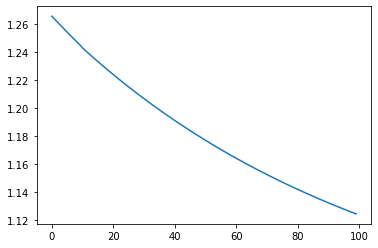

In [44]:
plt.plot(prediction_history)

In [45]:
start_day=169

In [46]:
x = np.arange(start_day, 169 + len(prediction_history))
x

array([169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181,
       182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207,
       208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233,
       234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246,
       247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259,
       260, 261, 262, 263, 264, 265, 266, 267, 268])

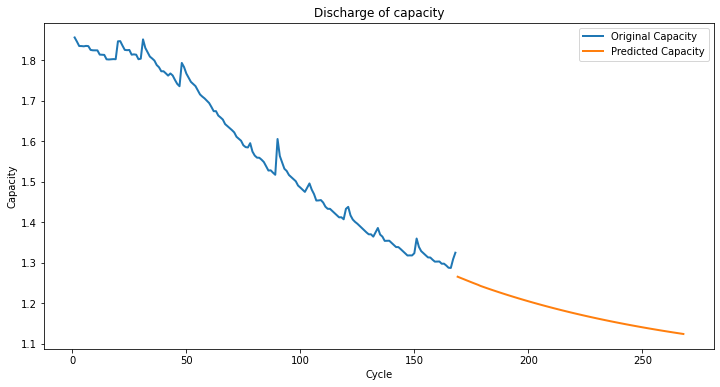

In [47]:
plt.figure(figsize=(12, 6))
plt.plot(df1['Discharge Cycles'], df1['Capacity'], label='Original Capacity', linewidth=2)
plt.plot(x,prediction_history, label='Predicted Capacity', linewidth=2)
plt.ylabel('Capacity')
plt.xlabel('Cycle')
plt.title(f'Discharge of capacity')
plt.legend()
plt.show()